In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#upload file
from google.colab.files import upload
file = upload()

Saving Amazon Customer Behavior Survey.csv to Amazon Customer Behavior Survey.csv


In [ ]:
df=pd.read_csv("Amazon Customer Behavior Survey.csv")
df.head()


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
# describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,602.0,30.790698,10.193276,3.0,23.0,26.0,36.0,67.0
Customer_Reviews_Importance,602.0,2.480066,1.185226,1.0,1.0,3.0,3.0,5.0
Personalized_Recommendation_Frequency,602.0,2.699336,1.042028,1.0,2.0,3.0,3.0,5.0
Rating_Accuracy,602.0,2.672757,0.899744,1.0,2.0,3.0,3.0,5.0
Shopping_Satisfaction,602.0,2.463455,1.012152,1.0,2.0,2.0,3.0,5.0


In [ ]:
# drop Timestamp from dataset
df.drop(['Timestamp'],inplace=True,axis=1)

In [ ]:
# checking null values
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [ ]:
df.dtypes

age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfaction                      int64
Service_Appreciation

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [ ]:
# class distribution
df.groupby("Gender").size()

Gender
Female               350
Male                 142
Others                19
Prefer not to say     89
dtype: int64

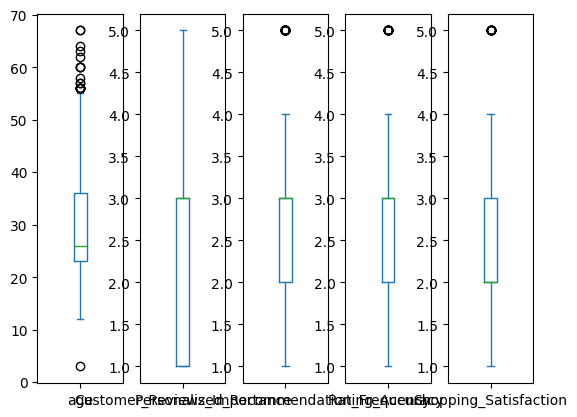

In [ ]:
# box and whisker plots
df.plot(kind="box", subplots=True, sharex=False, sharey=False)
plt.show()

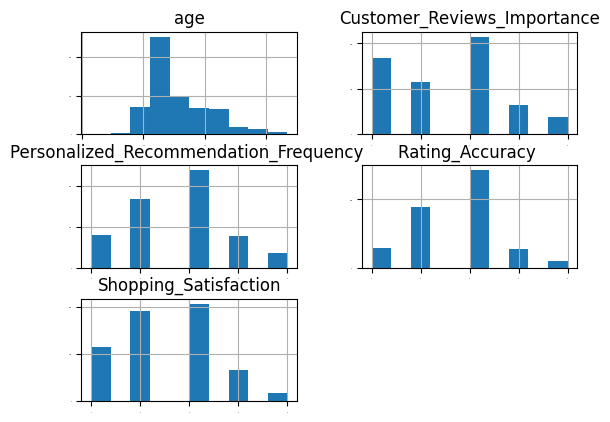

In [ ]:
# histogram
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

<ipython-input-14-05038e5ec4a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=1)


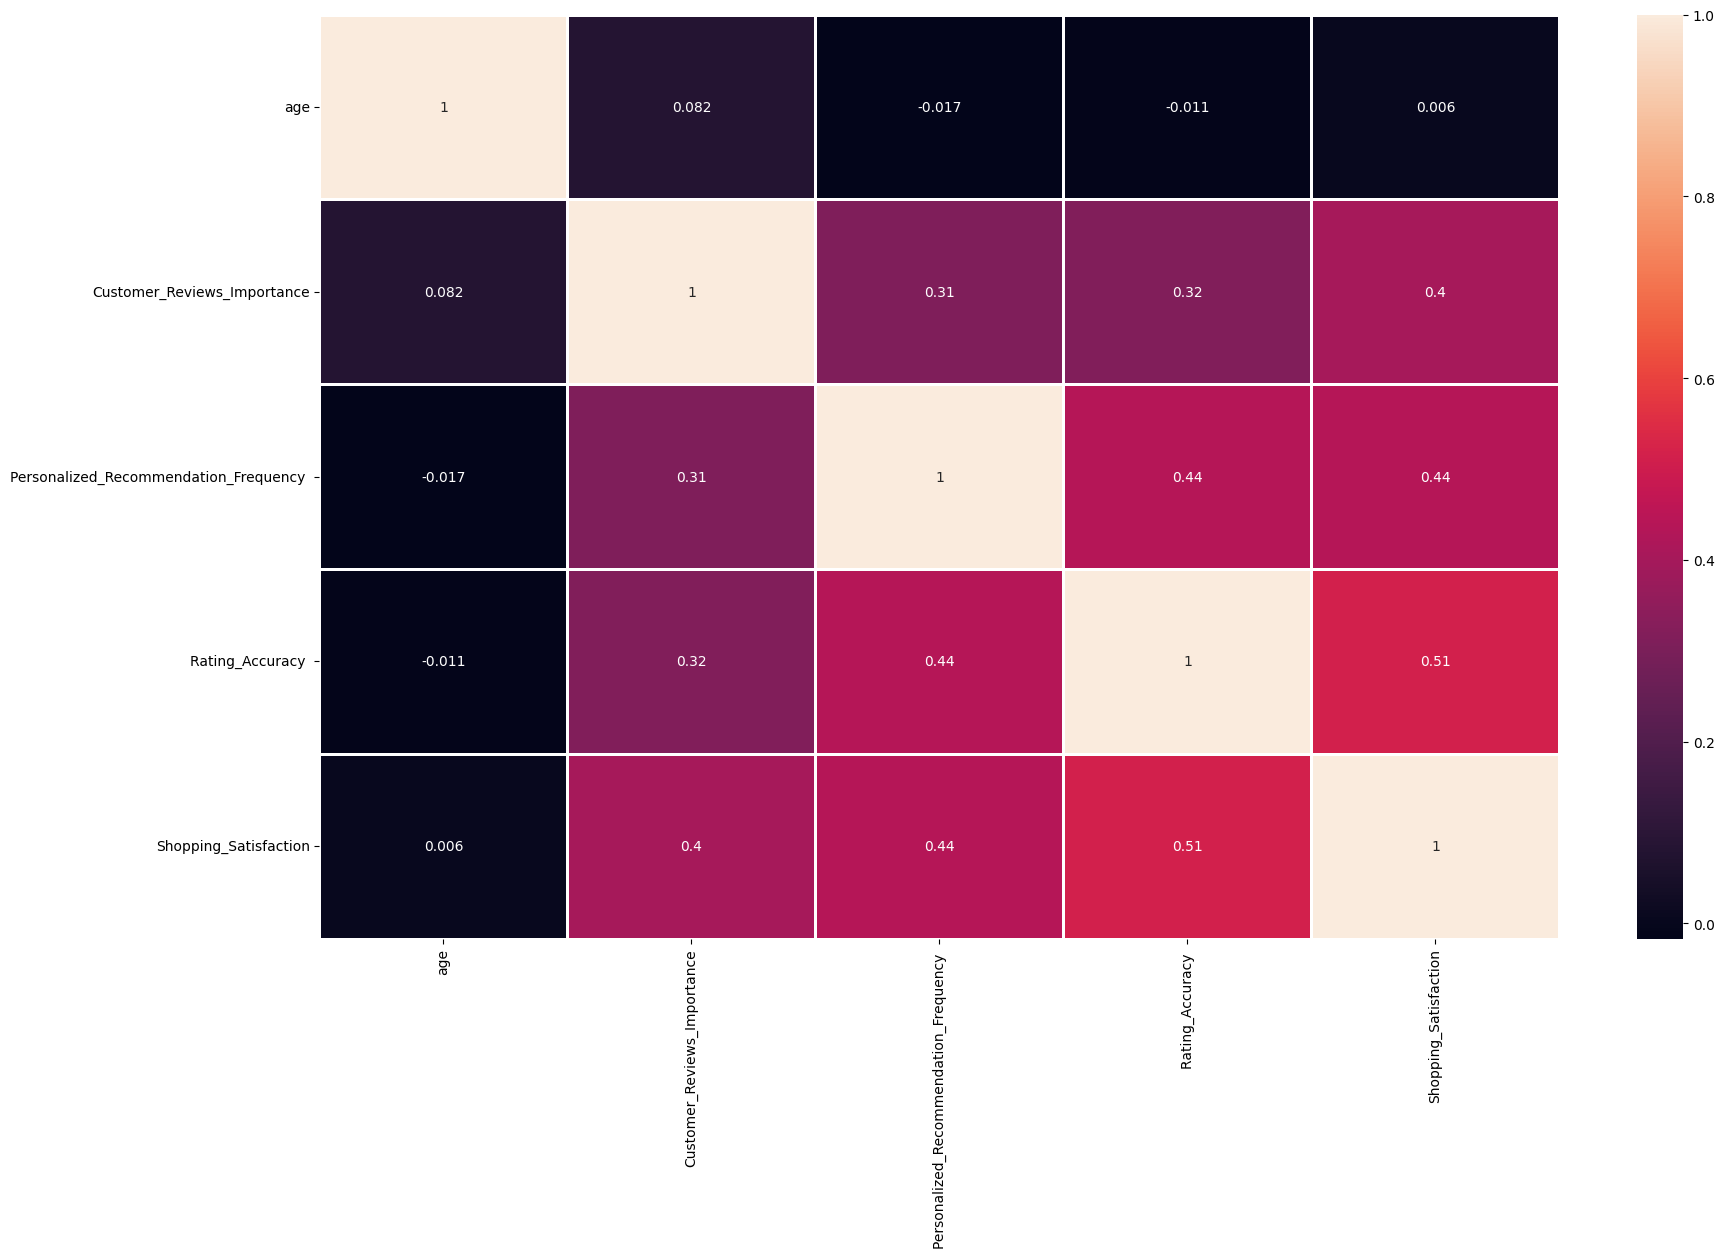

In [ ]:
#correlation between variables with heat map
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [ ]:
# split input and output variable
x = df.drop(['Gender'], axis=1)
y = df['Gender']

In [ ]:
# convert to string
x = x.astype(str)

In [ ]:
# prepare input data
def prepare_inputs(x_train, x_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(x_train)
    x_train_enc = oe.transform(x_train)
    x_test_enc = oe.transform(x_test)
    return x_train_enc, x_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [ ]:
# feature selection
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

In [ ]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 21), (120, 21), (480,), (120,))

In [ ]:
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)


In [ ]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train_enc, y_train_enc, x_test_enc)

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 89.560246
Feature 1: 7.271812
Feature 2: 183.280129
Feature 3: 2.343928
Feature 4: 3.535322
Feature 5: 3.176841
Feature 6: 1.041990
Feature 7: 12.640640
Feature 8: 12.816169
Feature 9: 8.426449
Feature 10: 1.590680
Feature 11: 5.749323
Feature 12: 0.656455
Feature 13: 6.098519
Feature 14: 8.554462
Feature 15: 7.469280
Feature 16: 4.361056
Feature 17: 2.585235
Feature 18: 8.411453
Feature 19: 5.058010
Feature 20: 9.032877


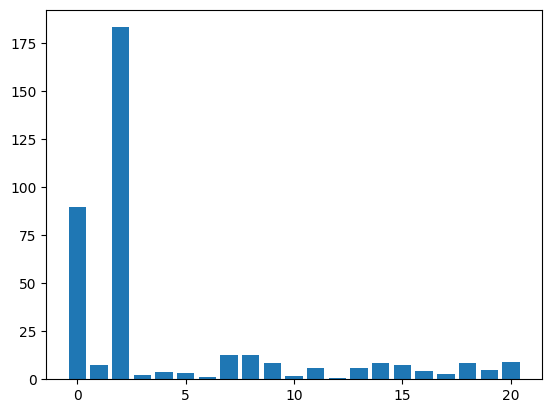

In [ ]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train_enc)
# select all rows that are not outliers
mask = yhat != -1
x_train_enc, y_train_enc = x_train_enc[mask, :], y_train_enc[mask]
# summarize the shape of the updated training dataset
print(x_train_enc.shape, y_train_enc.shape)

(480, 21) (480,)


In [ ]:
# spot check algorithms
models = []
models.append(("LR", LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train_enc, y_train_enc, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.2f (%.2f)" % (name, scores.mean(), scores.std()))

LR 0.57 (0.04)
LDA 0.57 (0.06)
DT 0.44 (0.09)
KNN 0.55 (0.04)
NB 0.48 (0.08)
SVM 0.60 (0.06)


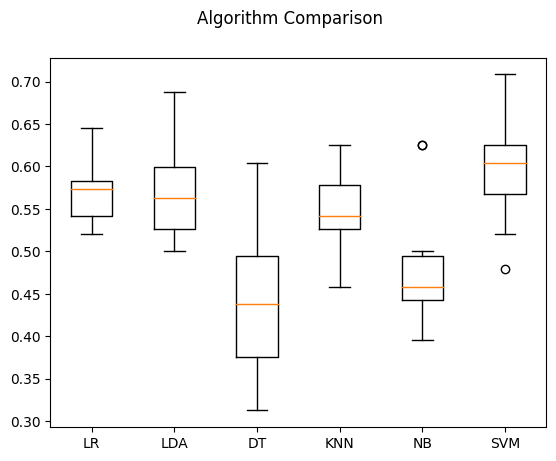

In [ ]:
# compare algorithm
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# tunned with svm
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(x_train_enc, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.598 using {'C': 0.1, 'kernel': 'linear'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'linear'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'sigmoid'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'linear'}
0.594 (0.064) with {'C': 0.3, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.5, 'kernel': 'linear'}
0.592 (0.063) with {'C': 0.5, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.5, 'kernel': 'rbf'}
0.596 (0.060) with {'C': 0.5, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.7, 'kernel': 'linear'}
0.592 (0.063) with {'C': 0.7, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.7, 'kernel': 'rbf'}
0.581 (0.052) with {'C': 0.7, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.9, 'kernel': 'linear'}
0.590 (0.060) with {'C': 0.9, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.9, 'kernel': 'rbf'}
0.583 (0.066) with {'C

In [ ]:
# standardize with basic algorithms
pipelines = []
pipelines.append(("scalerLR", Pipeline([("scaler", StandardScaler()), ("LR", LogisticRegression(solver="lbfgs", max_iter=1000))])))
pipelines.append(("scalerLDA", Pipeline([("scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("scalerKNN", Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("scalerNB", Pipeline([("scaler", StandardScaler()), ("NB", GaussianNB())])))
pipelines.append(("scalerCART", Pipeline([("scaler", StandardScaler()), ("CART", DecisionTreeClassifier())])))
pipelines.append(("scalerSVM", Pipeline([("scaler", StandardScaler()), ("SVM", SVC())])))

In [ ]:
# evaluate algorithm with standardize
names = []
results = []
for name, model in pipelines:
  cv = KFold(n_splits=10, random_state=None)
  scores = cross_val_score(model, x_train_enc, y_train_enc, scoring="accuracy", cv=cv)
  names.append(name)
  results.append(scores)
  print("%s %.3f (%.3f)" % (name, scores.mean(), scores.std()))

scalerLR 0.571 (0.040)
scalerLDA 0.573 (0.056)
scalerKNN 0.556 (0.038)
scalerNB 0.483 (0.077)
scalerCART 0.427 (0.067)
scalerSVM 0.592 (0.056)


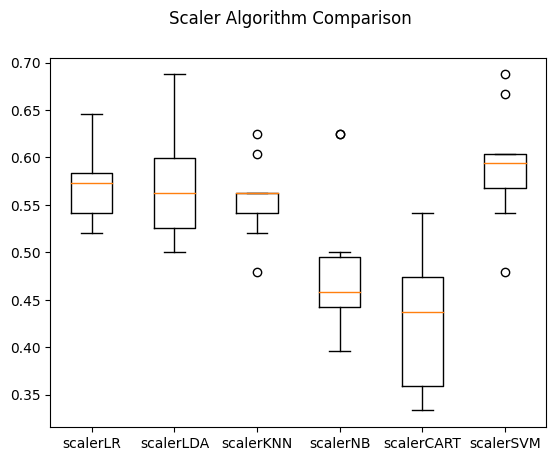

In [ ]:
# compare algorithm
fig = plt.figure()
fig.suptitle("Scaler Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# tuned with svm standardize
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train_enc)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(rescaled_x, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.598 using {'C': 0.1, 'kernel': 'linear'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'linear'}
0.596 (0.063) with {'C': 0.1, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.1, 'kernel': 'sigmoid'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'linear'}
0.598 (0.060) with {'C': 0.3, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.3, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.5, 'kernel': 'linear'}
0.596 (0.050) with {'C': 0.5, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.5, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.5, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.7, 'kernel': 'linear'}
0.588 (0.049) with {'C': 0.7, 'kernel': 'poly'}
0.598 (0.063) with {'C': 0.7, 'kernel': 'rbf'}
0.598 (0.063) with {'C': 0.7, 'kernel': 'sigmoid'}
0.596 (0.060) with {'C': 0.9, 'kernel': 'linear'}
0.585 (0.047) with {'C': 0.9, 'kernel': 'poly'}
0.592 (0.062) with {'C': 0.9, 'kernel': 'rbf'}
0.598 (0.063) with {'C

In [ ]:
# ensemble methods
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [ ]:
# evaluate each model with ensemble
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train_enc, y_train_enc, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

AB: 0.475 (0.071)
GBM: 0.581 (0.053)
RF: 0.590 (0.055)
ET: 0.583 (0.048)


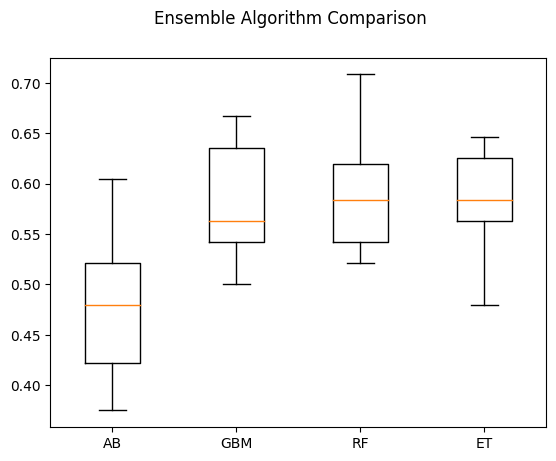

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# tuned with ETC
estimator = [10, 20, 50, 100, 200, 500, 1000]
criterion= ['gini', 'entropy']
param_grid = dict(n_estimators=estimator, criterion=criterion)
model = ExtraTreesClassifier()
cv = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_result = grid.fit(x_train_enc, y_train_enc)
print("Best: %.3f using %r" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print("%.3f (%.3f) with %r" % (mean, std, param))

Best: 0.594 using {'criterion': 'entropy', 'n_estimators': 200}
0.573 (0.078) with {'criterion': 'gini', 'n_estimators': 10}
0.575 (0.045) with {'criterion': 'gini', 'n_estimators': 20}
0.579 (0.053) with {'criterion': 'gini', 'n_estimators': 50}
0.575 (0.043) with {'criterion': 'gini', 'n_estimators': 100}
0.585 (0.042) with {'criterion': 'gini', 'n_estimators': 200}
0.592 (0.042) with {'criterion': 'gini', 'n_estimators': 500}
0.590 (0.044) with {'criterion': 'gini', 'n_estimators': 1000}
0.565 (0.066) with {'criterion': 'entropy', 'n_estimators': 10}
0.569 (0.035) with {'criterion': 'entropy', 'n_estimators': 20}
0.590 (0.054) with {'criterion': 'entropy', 'n_estimators': 50}
0.583 (0.048) with {'criterion': 'entropy', 'n_estimators': 100}
0.594 (0.046) with {'criterion': 'entropy', 'n_estimators': 200}
0.585 (0.055) with {'criterion': 'entropy', 'n_estimators': 500}
0.588 (0.050) with {'criterion': 'entropy', 'n_estimators': 1000}


In [ ]:
# ensembles with standardize
ensembles = []
ensembles.append(("scalerRF", Pipeline([("scaler", StandardScaler()), ("RF", RandomForestClassifier())])))
ensembles.append(("scalerGBM", Pipeline([("scaler", StandardScaler()), ("GBM", GradientBoostingClassifier())])))
ensembles.append(("scalerET", Pipeline([("scaler", StandardScaler()), ("ET", ExtraTreesClassifier())])))
ensembles.append(("scalerAB", Pipeline([("scaler", StandardScaler()), ("AB", AdaBoostClassifier())])))

In [ ]:
# evaluate each model with ensemble
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, x_train_enc, y_train_enc, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

scalerRF: 0.594 (0.058)
scalerGBM: 0.585 (0.051)
scalerET: 0.583 (0.043)
scalerAB: 0.473 (0.070)


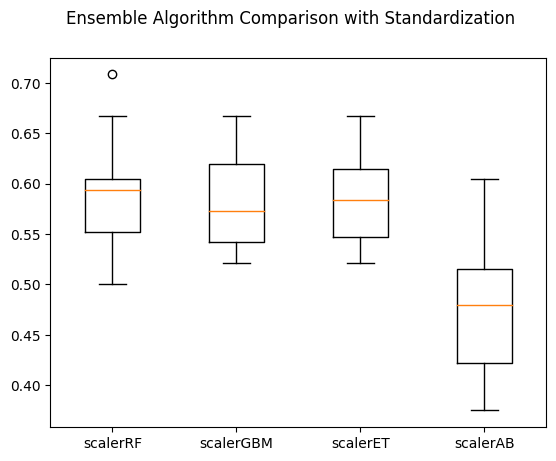

In [41]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison with Standardization')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

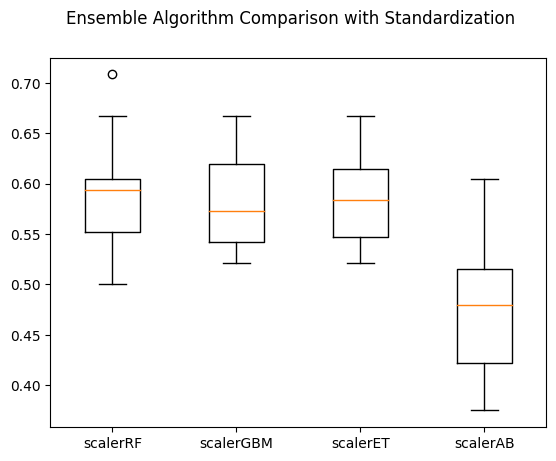

In [42]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison with Standardization')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
# prepare the model
model = ExtraTreesClassifier(n_estimators=50, criterion="entropy")
model.fit(x_train_enc, y_train_enc)

ExtraTreesClassifier(criterion='entropy', n_estimators=50)

In [ ]:
# estimate accuracy on validation dataset
predictions = model.predict(x_test_enc)
print(accuracy_score(y_test_enc, predictions))
print(confusion_matrix(y_test_enc, predictions))
print(classification_report(y_test_enc, predictions))